In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x
    

model = LeNet()
model.load_state_dict(torch.load('lenet-weights.pt', weights_only=True))
model.eval()



LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
# copied from training

from torchvision import datasets
from torchvision.transforms import v2

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"inference on {dev}")
model = model.to(dev)


batch_size = 1
transforms = v2.Compose([v2.Pad(2), v2.ToImage(), v2.ToDtype(torch.float32, scale=True), v2.Normalize(mean=[0.1307], std=[0.3081])])
test_dataset = datasets.MNIST('./data', train=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

inference on cuda


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def view_classify(img, pred):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img, cmap='gray_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), pred)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('class propability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()



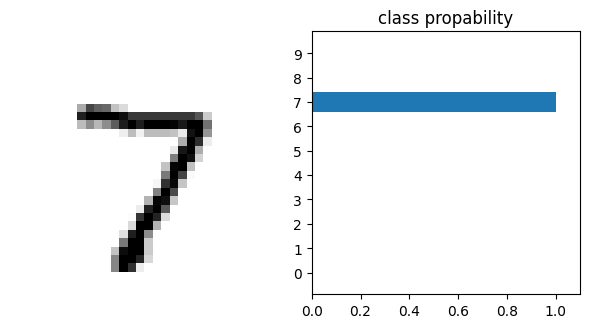

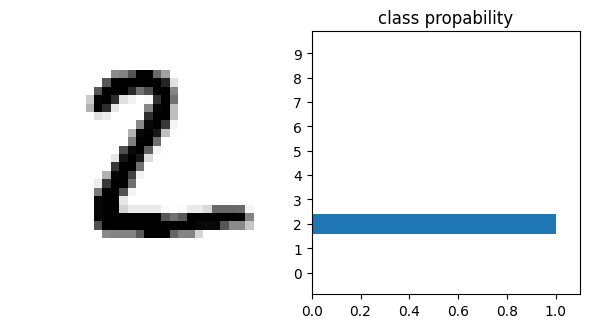

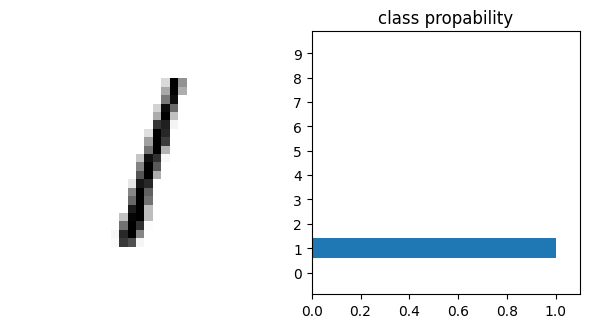

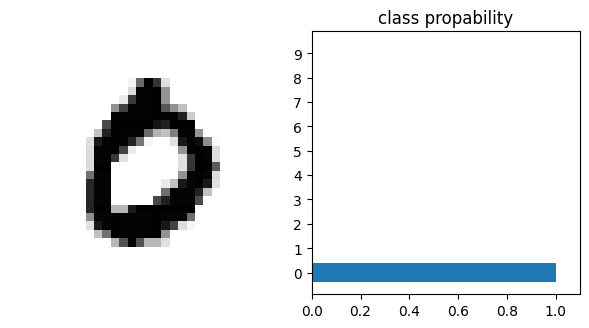

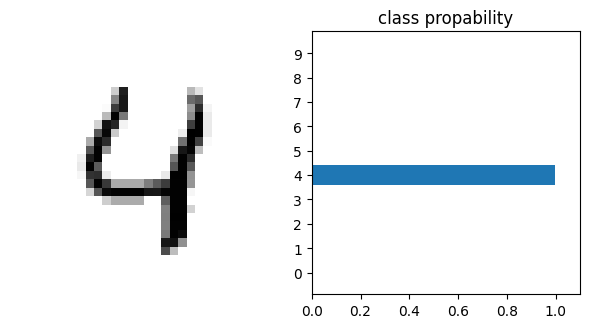

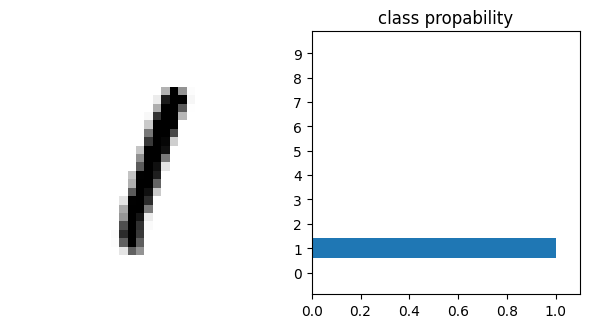

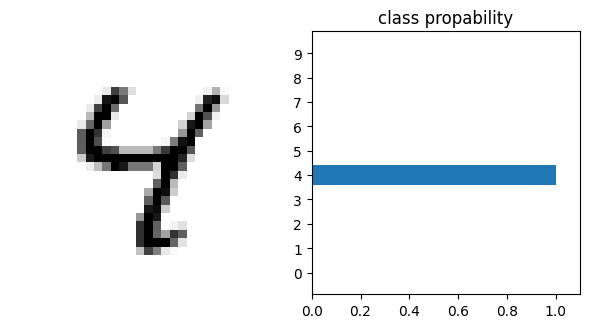

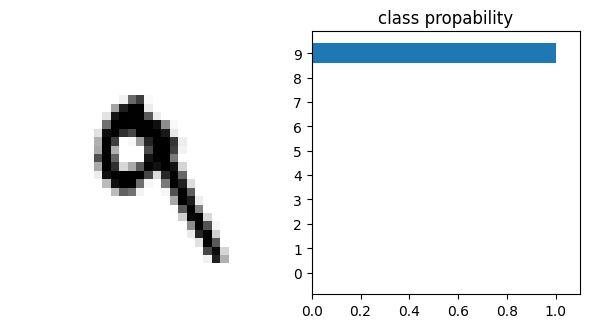

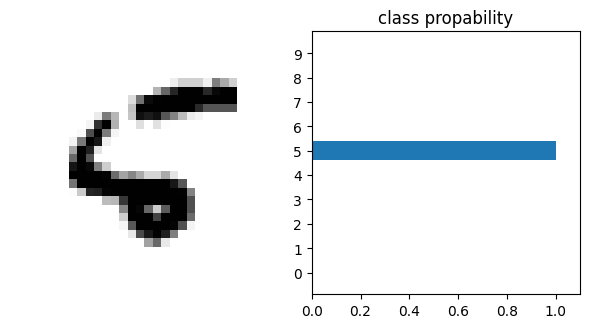

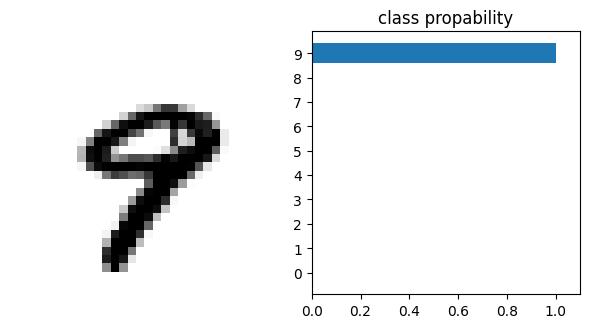

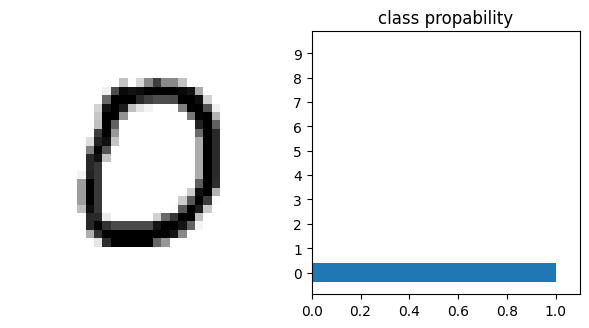

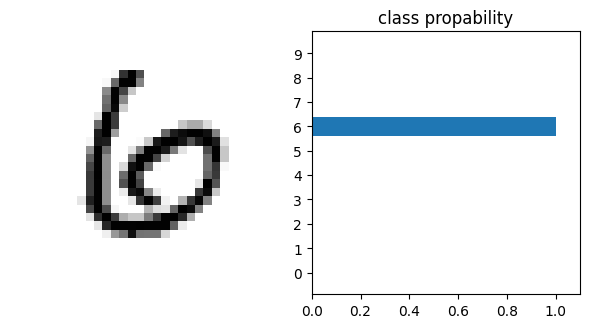

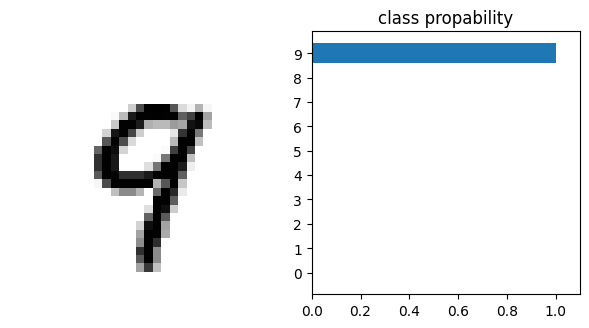

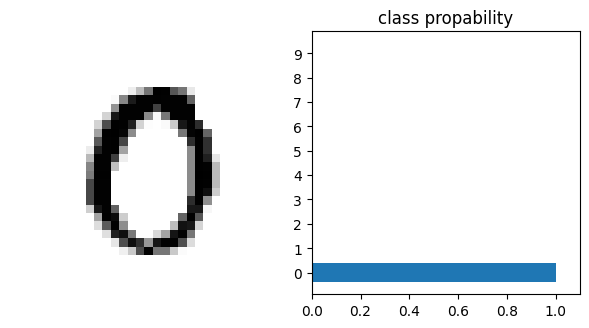

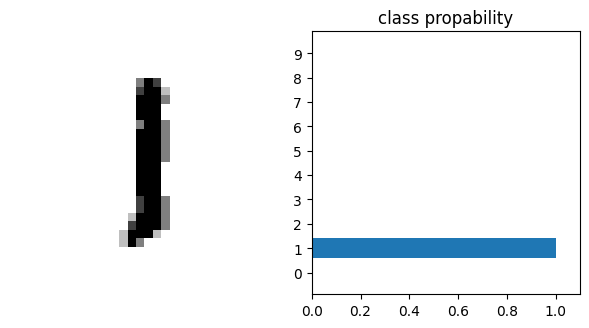

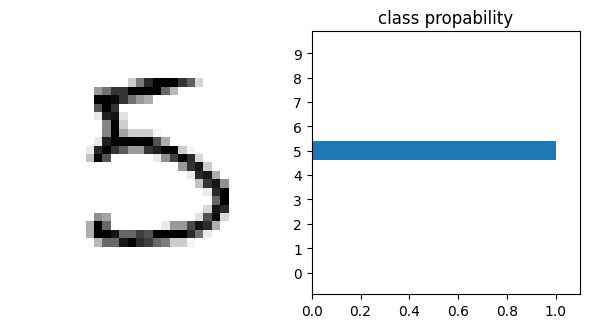

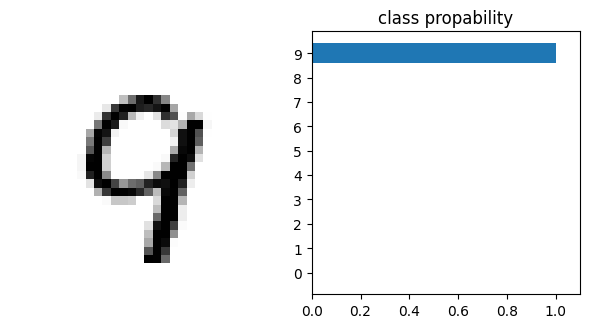

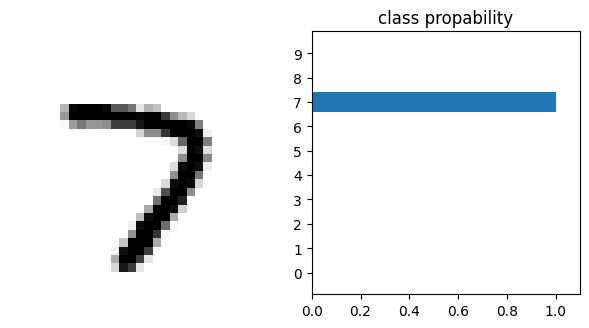

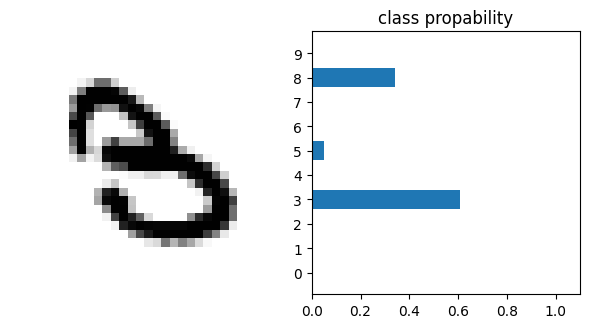

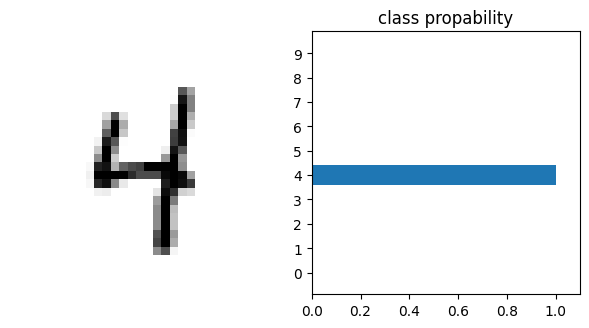

In [18]:
def make_prediction(loader, num_samples=20):
    for i, (image,label) in enumerate(loader):
        if i == num_samples:
            break
        with torch.no_grad():
            pred = model(image.to(dev)).to('cpu')
        pred = F.softmax(pred, dim=-1)
        view_classify(image[0][0], pred[0])

make_prediction(test_loader)